# **Understand the Dataset structure and check for missing or inconsistent values**



**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping

**Upload the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


**Understand the Dataset structure**

In [3]:
# Display the first few rows of the Dataset for the inspection

import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.csv')
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check missing values and summarize the dataset

missing_data = data.isnull().sum()
summary = data.describe()

missing_data, summary

(ID                    0
 Diagnosis             0
 radius1               0
 texture1              0
 perimeter1            0
 area1                 0
 smoothness1           0
 compactness1          0
 concavity1            0
 concave_points1       0
 symmetry1             0
 fractal_dimension1    0
 radius2               0
 texture2              0
 perimeter2            0
 area2                 0
 smoothness2           0
 compactness2          0
 concavity2            0
 concave_points2       0
 symmetry2             0
 fractal_dimension2    0
 radius3               0
 texture3              0
 perimeter3            0
 area3                 0
 smoothness3           0
 compactness3          0
 concavity3            0
 concave_points3       0
 symmetry3             0
 fractal_dimension3    0
 dtype: int64,
                  ID     radius1    texture1  perimeter1        area1  \
 count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
 mean   3.037183e+07   14.127292   19.2

**Data Preprocessing**

In [5]:
# Drop the ID column
cleaned_data = data.drop(columns=[data.columns[0]])

# Encode the diagnosis column ('M' -> 1, 'B' -> 0)
label_encoder = LabelEncoder()
cleaned_data[cleaned_data.columns[0]] = label_encoder.fit_transform(cleaned_data[cleaned_data.columns[0]])

# Display the cleaned dataset
cleaned_data.head()

# Save the cleaned dataset to a CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)


**Visualize the Dataset**

<ipython-input-6-b5d9a0e489af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


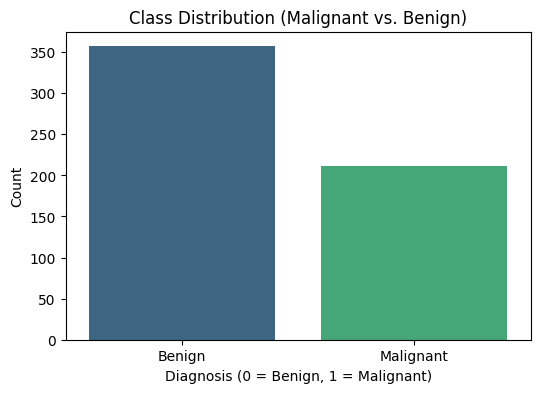

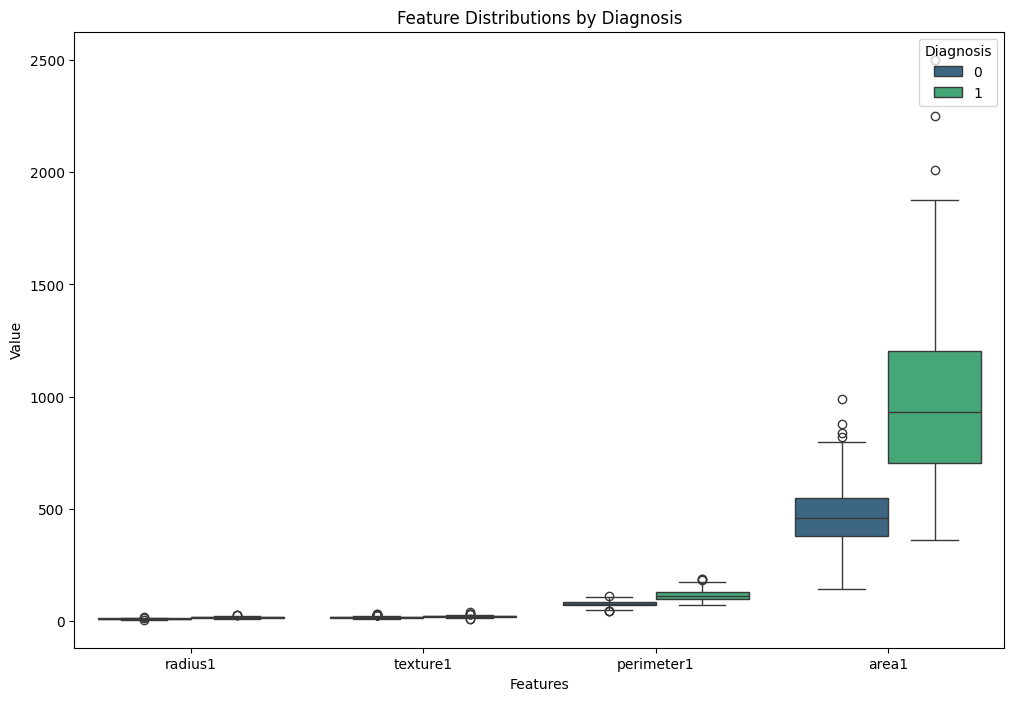

In [6]:
# Visualize class distribution
class_distribution = cleaned_data['Diagnosis'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution (Malignant vs. Benign)')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

# Visualize feature distributions by diagnosis for a subset of features
features_to_visualize = ['radius1', 'texture1', 'perimeter1', 'area1']
data_melted = cleaned_data.melt(id_vars='Diagnosis', value_vars=features_to_visualize, var_name='Feature', value_name='Value')

# Plot feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Feature', y='Value', hue='Diagnosis', data=data_melted, palette='viridis')
plt.title('Feature Distributions by Diagnosis')
plt.xlabel('Features')
plt.ylabel('Value')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()



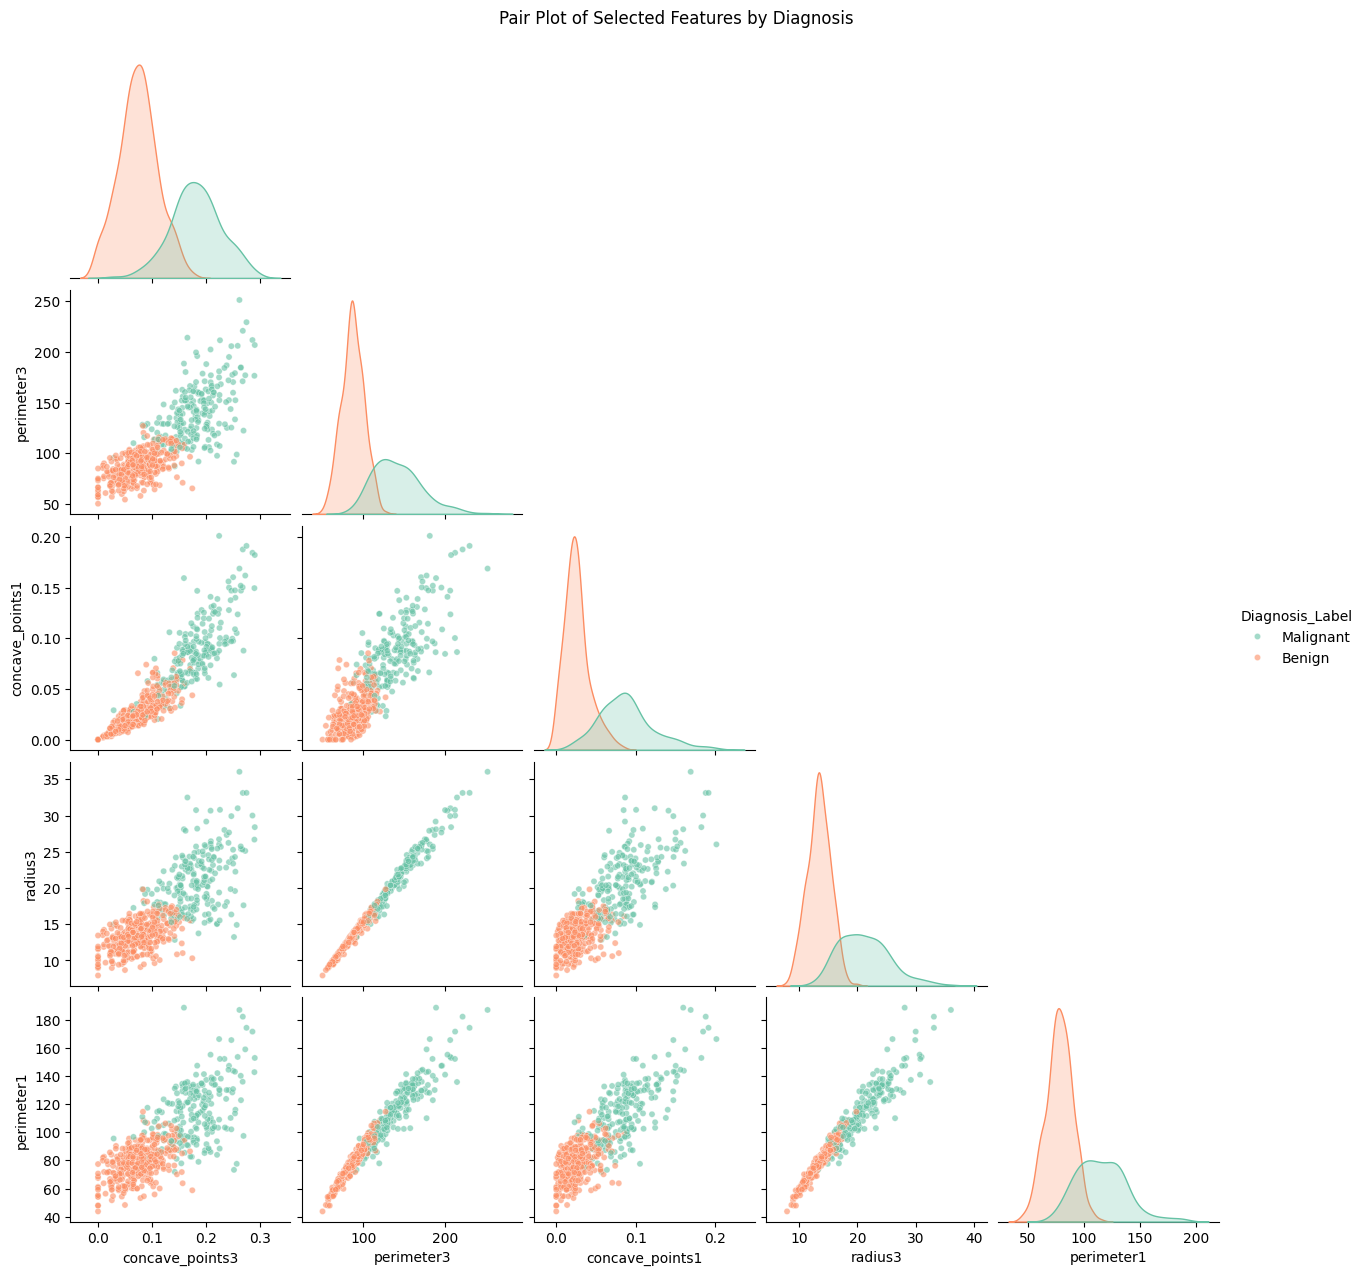

In [7]:
# Generate a pair plot to visualize feature relationships by diagnosis
cleaned_data['Diagnosis_Label'] = cleaned_data['Diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Selecting Features for the pair plot
selected_features = ['concave_points3', 'perimeter3', 'concave_points1', 'radius3', 'perimeter1']

# Create a pair plot
pairplot = sns.pairplot(
    cleaned_data[selected_features + ['Diagnosis_Label']],
    hue='Diagnosis_Label',
    palette='Set2',
    diag_kind='kde',
    corner=True,
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 20},  # Transparency and marker size
)

# Add a title to the entire plot
pairplot.fig.suptitle("Pair Plot of Selected Features by Diagnosis", y=1.02)

# Show the plot
plt.show()


**Split and Scale the dataset**

In [9]:
# Ensure only numeric columns are used for X
X = cleaned_data.drop(columns=['Diagnosis_Label']).iloc[:, 1:].values  # Drop the added non-numeric column explicitly
y = cleaned_data['Diagnosis'].values  # Ensure target variable is correctly assigned

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# **Model Implementation and Training**



**Logistic Regression Implementation**

In [10]:
# Logistic Regression
def train_logistic_regression(X_train, y_train):
    param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
    grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Best parameters for Logistic Regression: {grid.best_params_}")
    return grid.best_estimator_


**Support Vector Machine (SVM) Implementation**

In [11]:
# SVM
def train_svm(X_train, y_train):
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
    grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Best parameters for SVM: {grid.best_params_}")
    return grid.best_estimator_

**Implementing Decision Tree**

In [12]:
# Decision Tree
def train_decision_tree(X_train, y_train):
    param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
    grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Best parameters for Decision Tree: {grid.best_params_}")
    return grid.best_estimator_

**Artificial Neural Network (ANN) Implementation**

In [13]:
# ANN
def train_ann(X_train, y_train):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1, callbacks=[early_stopping])
    return model



**Train models**

In [14]:
logistic_model = train_logistic_regression(X_train, y_train)
svm_model = train_svm(X_train, y_train)
decision_tree = train_decision_tree(X_train, y_train)
ann_model = train_ann(X_train, y_train)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3381 - loss: 1.0089 - val_accuracy: 0.7363 - val_loss: 0.5988
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 0.6183 - val_accuracy: 0.8901 - val_loss: 0.4200
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8219 - loss: 0.4374 - val_accuracy: 0.9231 - val_loss: 0.3140
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.3091 - val_accuracy: 0.9231 - val_loss: 0.2446
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9549 - loss: 0.2289 - val_accuracy: 0.9341 - val_loss: 0.2056
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.2276 - val_accuracy: 0.9341 - val_loss: 0.1785
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9283 - loss: 0.1962 - val_accuracy: 0.9560 - val_loss: 0.1614
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9522 - loss: 0.1772 - val_accuracy: 0.9560 - val_loss

**Evaluate all models**

In [15]:
def evaluate_model(preds, probs, y_test):
    cm = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    report = classification_report(y_test, preds)
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'AUC': auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Report': report
    }

In [16]:
# Generate predictions and evaluate each model
logistic_preds = logistic_model.predict(X_test)
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]

svm_preds = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

dt_preds = decision_tree.predict(X_test)
dt_probs = decision_tree.predict_proba(X_test)[:, 1]

ann_probs = ann_model.predict(X_test).ravel()
ann_preds = (ann_probs > 0.5).astype(int)

models = {
    'Logistic Regression': (logistic_preds, logistic_probs),
    'SVM': (svm_preds, svm_probs),
    'Decision Tree': (dt_preds, dt_probs),
    'ANN': (ann_preds, ann_probs)
}

results = {}
for name, (preds, probs) in models.items():
    results[name] = evaluate_model(preds, probs, y_test)

    # Display results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"AUC: {result['AUC']:.2f}" if result['AUC'] is not None else "AUC: N/A")
    print(f"F1-Score: {result['F1-Score']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Report'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Logistic Regression Results:
Accuracy: 0.98
AUC: 1.00
F1-Score: 0.98
Confusion Matrix:
[[72  0]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


SVM Results:
Accuracy: 0.98
AUC: 1.00
F1-Score: 0.98
Confusion Matrix:
[[72  0]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Decision Tree Results:
Accuracy: 0.94
AUC: 0.94
F1-Score: 0.92


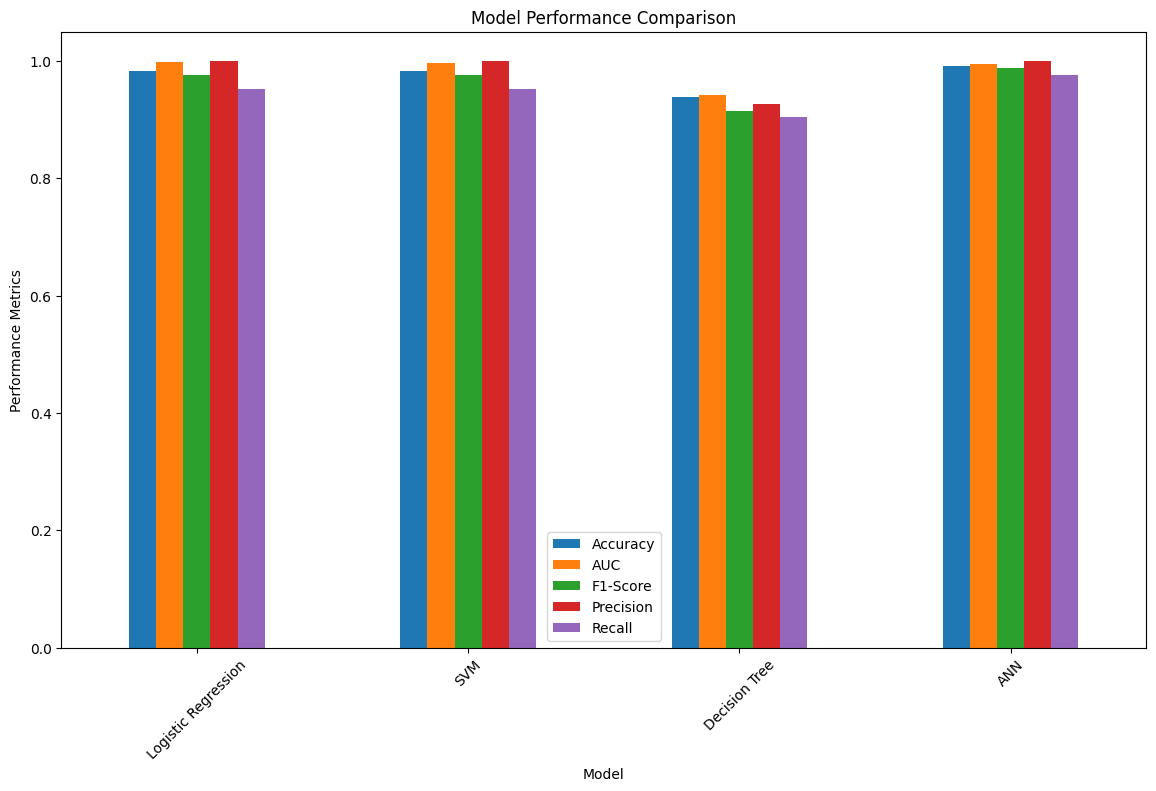

In [17]:
# Performance comparison bar plot
def visualize_model_performance(results):

    """Visualize performance metrics across multiple models."""

    performance_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [result['Accuracy'] for result in results.values()],
        'AUC': [result['AUC'] for result in results.values()],
        'F1-Score': [result['F1-Score'] for result in results.values()],
        'Precision': [result['Precision'] for result in results.values()],
        'Recall': [result['Recall'] for result in results.values()]
    })

    performance_df.set_index('Model', inplace=True)
    performance_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Performance Metrics')
    plt.xticks(rotation=45)
    plt.show()

visualize_model_performance(results)


**Display the Confusion Matrix as a Heatmap**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


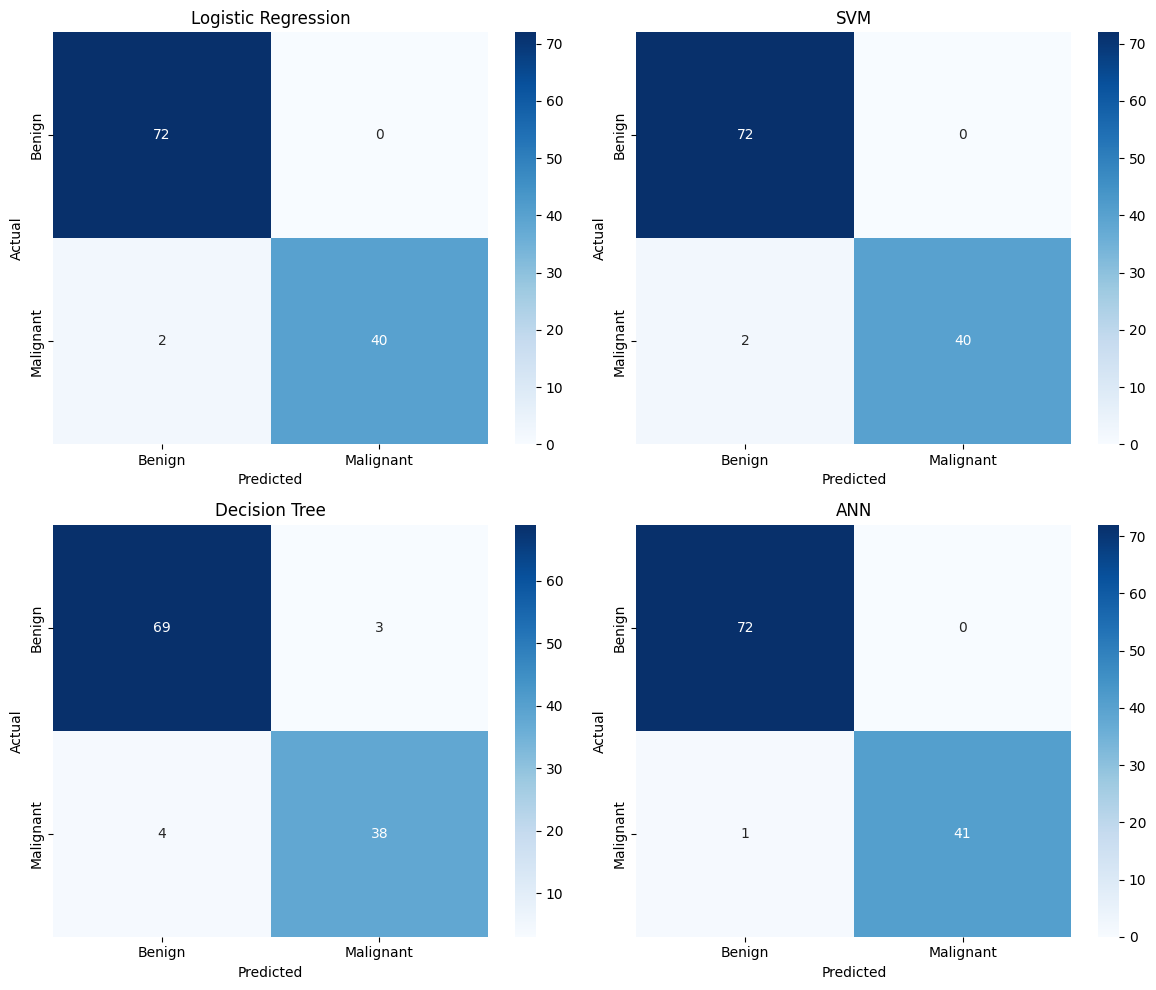

In [18]:
models = {"Logistic Regression": logistic_model, "SVM": svm_model, "Decision Tree": decision_tree, "ANN": ann_model}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, model) in zip(axes.flatten(), models.items()):

    if name == 'ANN':
        preds = (model.predict(X_test).ravel() > 0.5).astype(int)
    else:
        preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


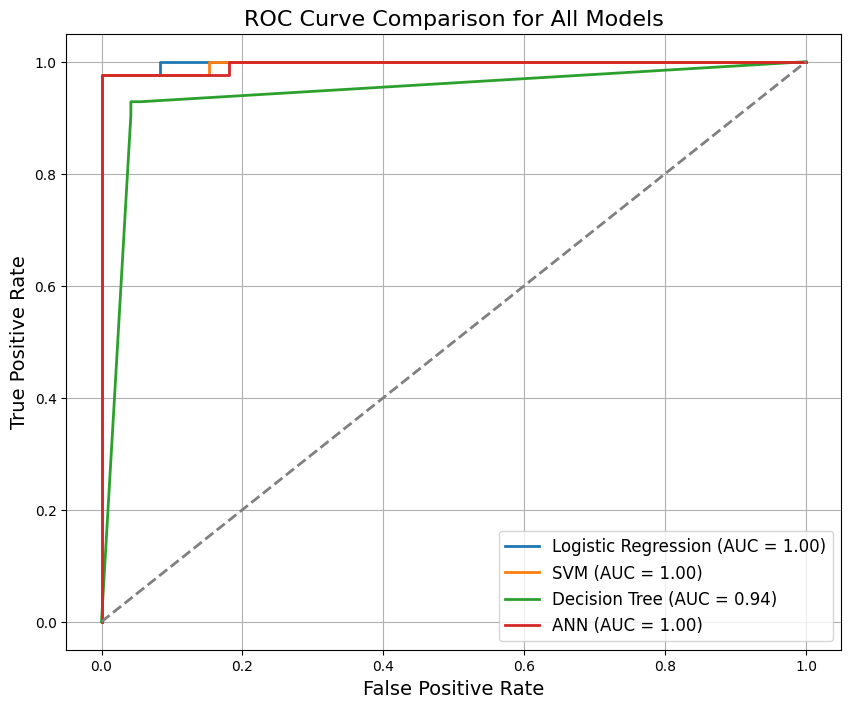

In [19]:
# Plot combined ROC curve
def plot_combined_roc_curve(y_test, models):
    plt.figure(figsize=(10, 8))

    for model_name, (preds, probs) in models.items():
        # Calculate FPR, TPR, and AUC for each model
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the random chance line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

    # Configure the plot
    plt.title('ROC Curve Comparison for All Models', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

models = {
    'Logistic Regression': (logistic_preds, logistic_probs),
    'SVM': (svm_preds, svm_probs),
    'Decision Tree': (dt_preds, dt_probs),
    'ANN': (ann_preds, ann_probs)
}

# Plot the combined ROC curve
plot_combined_roc_curve(y_test, models)
